In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('spam_ham_dataset[1].csv')

In [56]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3671,3165,ham,Subject: may 1\r\n- - - - - - - - - - - - - - ...,0
874,1893,ham,Subject: re : meter 0980438 - acock production...,0
4115,504,ham,Subject: april availabilities\r\n- - - - - - -...,0
2717,4748,spam,Subject: date a new wild babe tonight\r\nbored...,1
4480,4302,spam,Subject: m 33 t someone tonight\r\nsexy\r\nmar...,1


In [57]:
df.shape

(5171, 4)

In [58]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [16]:
#renaming the cols
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,Unnamed: 0,target,text,label_num,transformed_text
4601,1441,ham,Subject: organizational announcement\r\nplease...,0,subject organiz announc pleas see attach memo
173,754,ham,Subject: well head\r\nshoreline wants to incre...,0,subject well head shorelin want increas volum ...
442,210,ham,Subject: purchase and sale nominations - eastr...,0,subject purchas sale nomin eastran pipelin car...
4701,3513,ham,Subject: fw : waha hubco\r\nfyi\r\n- - - - - o...,0,subject fw waha hubco fyi origin messag redmon...
578,4552,spam,Subject: heisser fetish\r\nmann war das ein wo...,1,subject heisser fetish mann war da ein wochene...


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [63]:
df.head()

,Unnamed: 0,target,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [64]:
# missing values 
df.isnull().sum()

Unnamed: 0    0
target        0
text          0
label_num     0
dtype: int64

In [65]:
# check for duplicate values
df.duplicated().sum()

0

## 2. EDA

In [66]:
df.head()

,Unnamed: 0,target,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [67]:
df['target'].value_counts()

target
0    3672
1    1499
Name: count, dtype: int64

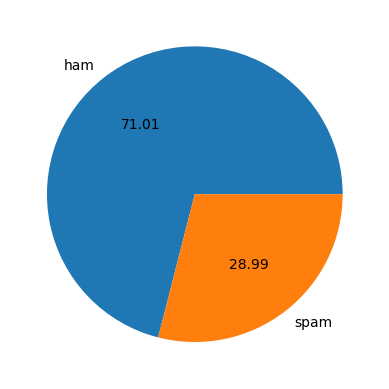

In [49]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [73]:
# Data is imbalanced

In [5]:
import nltk

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riya_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
df['num_characters']=df['text'].apply(len)

In [118]:
df.head()

,Unnamed: 0,target,text,label_num,transformed_text,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...,327
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...,97
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...,2524
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...,414
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...,336


In [119]:
#num of words 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [120]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [121]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [46]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

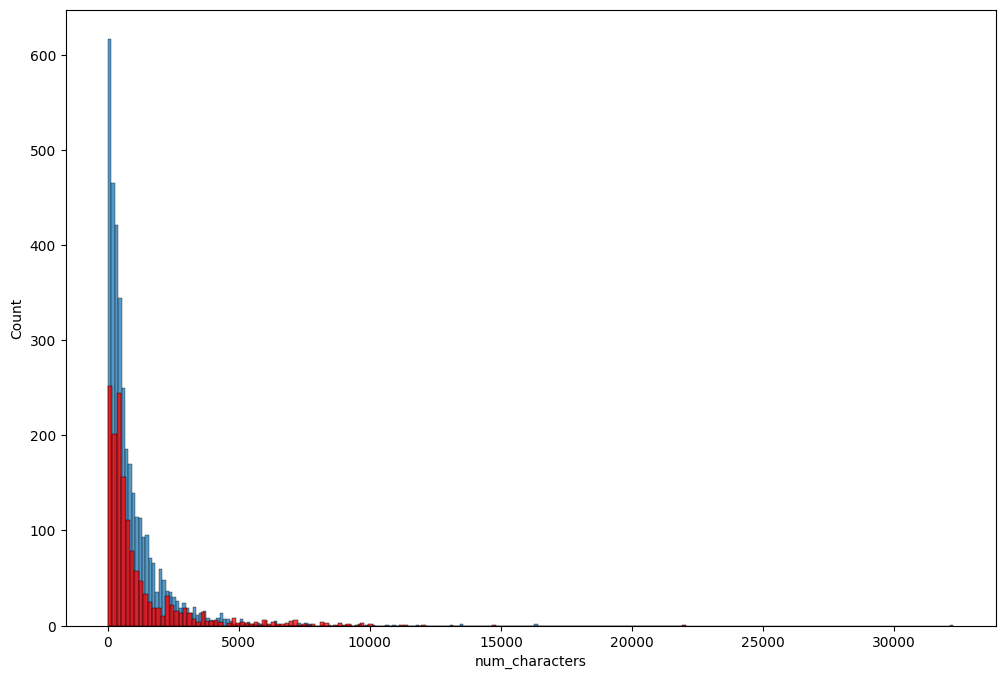

In [82]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

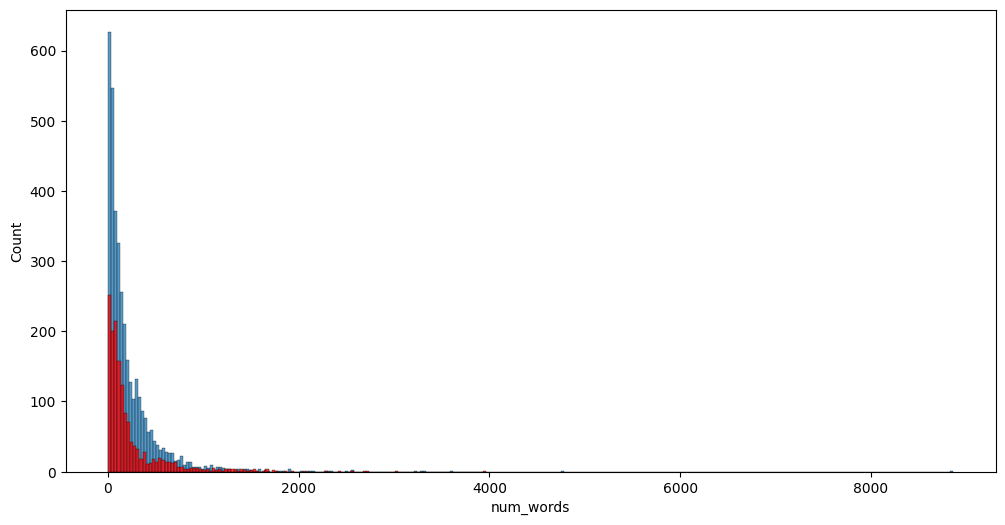

In [83]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

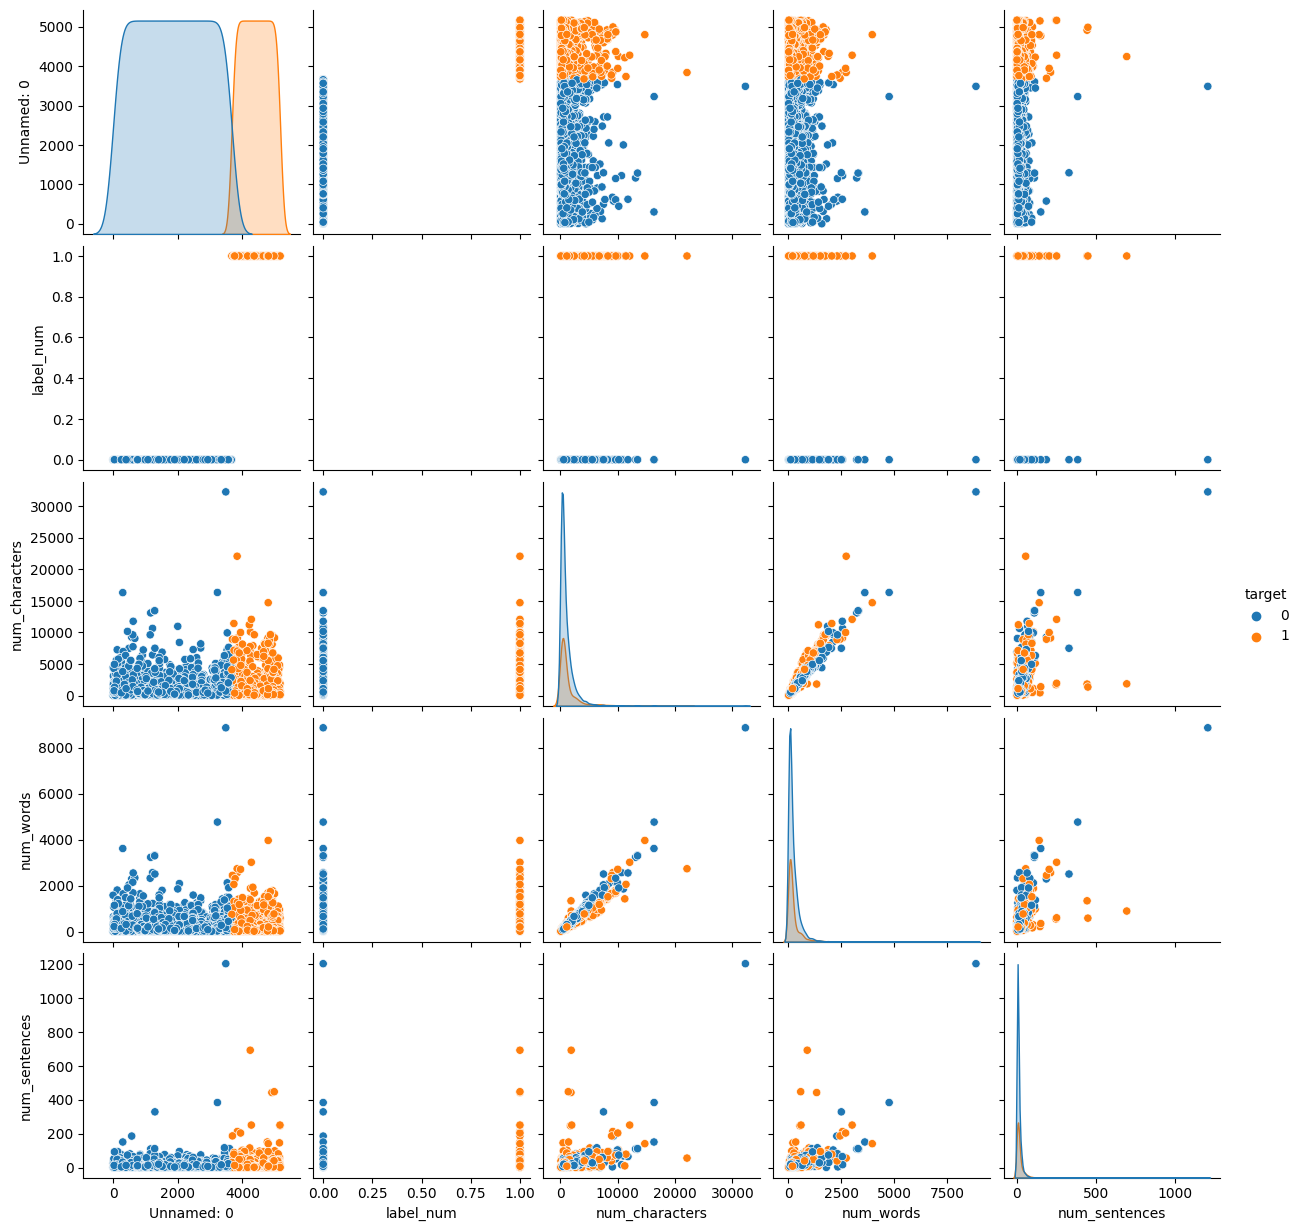

In [84]:
sns.pairplot(df,hue='target')

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['text']=encoder.fit_transform(df['text'])

In [86]:
df.sample(5)

,Unnamed: 0,target,text,label_num,num_characters,num_words,num_sentences
3273,3358,0,2691,0,2312,567,46
4659,1233,0,1076,0,129,34,4
1882,4719,1,875,1,349,79,8
1651,540,0,3146,0,1338,333,10
2578,3565,0,2737,0,895,182,9


<Axes: >

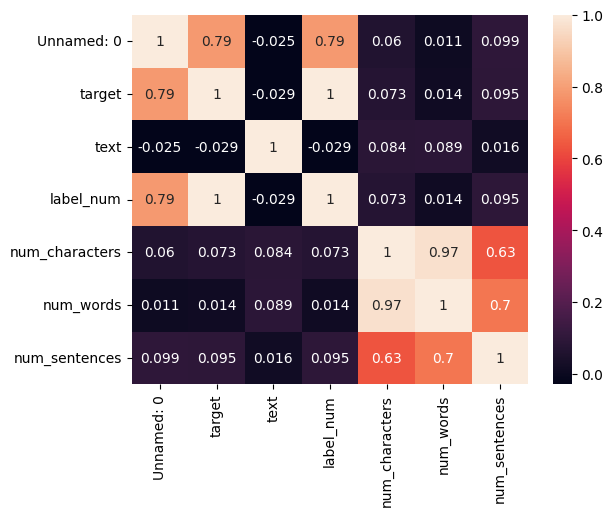

In [87]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
   . Lowercase
   . Tokenization
   . Removing special characters
   . Removing stopwords and punctuation
   . Stemming

In [7]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)  
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
                  
    return " ".join(y)

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
transform_text("I loved the YI lectures on Machine Learning?")

'love yi lectur machin learn'

In [10]:
df['text'][10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('love')

'love'

In [15]:
df['transformed_text']=df['text'].apply(transform_text)

In [19]:
df.head()

,Unnamed: 0,target,text,label_num,transformed_text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [43]:
ham_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

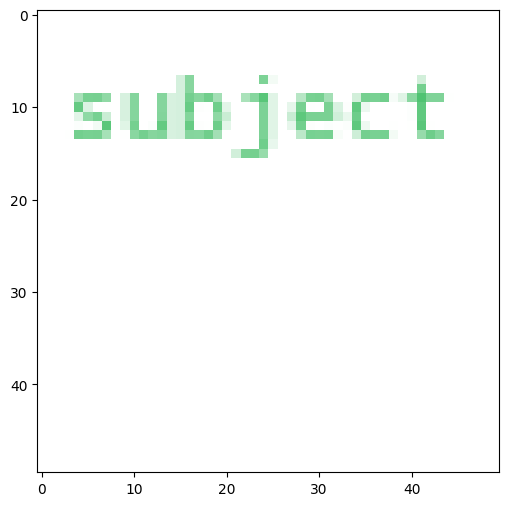

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,Unnamed: 0,target,text,label_num,transformed_text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [54]:
len(spam_corpus)

197452

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

388650

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [40]:
# Text Vectorization
# using Bag of words
df.head()

,Unnamed: 0,target,text,label_num,transformed_text
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [125]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [126]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [127]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [157]:
# appending the num_character col to X
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [129]:
X.shape

(5171, 3001)

In [130]:
y=df['target'].values

In [131]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [134]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [135]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [136]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.970048309178744
[[731  15]
 [ 16 273]]
0.9479166666666666


In [137]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9458937198067633
[[703  43]
 [ 13 276]]
0.8652037617554859


In [138]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9169082125603865
[[690  56]
 [ 30 259]]
0.8222222222222222


In [139]:
# tfidf --> GNB

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [141]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
Irc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [142]:
clfs={
    'SVC':svc,
    'KN' : knc,
    'NB' : mnb,
    'DT': dtc,
    'LR': Irc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [143]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [144]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\riya_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7207729468599033, 0.0)

In [145]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy -", current_accuracy)
    print("precision -",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\riya_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.7207729468599033
precision - 0.0
For KN
Accuracy - 0.7101449275362319
precision - 0.4708994708994709
For NB
Accuracy - 0.9458937198067633
precision - 0.8652037617554859
For DT
Accuracy - 0.8415458937198068
precision - 0.6456876456876457
For LR
Accuracy - 0.9710144927536232
precision - 0.9273927392739274
For RF
Accuracy - 0.9806763285024155
precision - 0.9590443686006825
For AdaBoost
Accuracy - 0.966183574879227
precision - 0.9123376623376623
For BgC
Accuracy - 0.9565217391304348
precision - 0.8986928104575164
For ETC
Accuracy - 0.9806763285024155
precision - 0.9528619528619529
For GBDT
Accuracy - 0.9565217391304348
precision - 0.9093959731543624
For xgb
Accuracy - 0.9748792270531401
precision - 0.933993399339934


In [146]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [147]:
performance_df

,Algorithm,Accuracy,precision
5,RF,0.980676,0.959044
8,ETC,0.980676,0.952862
10,xgb,0.974879,0.933993
4,LR,0.971014,0.927393
6,AdaBoost,0.966184,0.912338
7,BgC,0.956522,0.898693
9,GBDT,0.956522,0.909396
2,NB,0.945894,0.865204
3,DT,0.841546,0.645688
0,SVC,0.720773,0.000000


In [148]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [149]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.980676
1,ETC,Accuracy,0.980676
2,xgb,Accuracy,0.974879
3,LR,Accuracy,0.971014
4,AdaBoost,Accuracy,0.966184
5,BgC,Accuracy,0.956522
6,GBDT,Accuracy,0.956522
7,NB,Accuracy,0.945894
8,DT,Accuracy,0.841546
9,SVC,Accuracy,0.720773


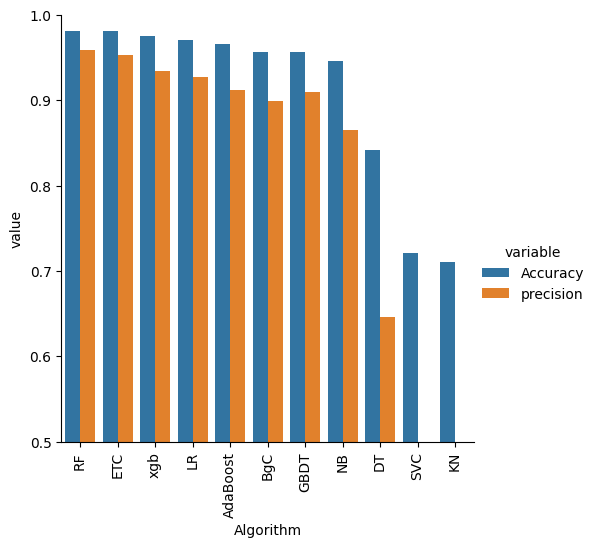

In [150]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [151]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [152]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [153]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [154]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [155]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [158]:
new_df_scaled

,Algorithm,Accuracy,precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.980676,0.959044,0.980676,0.959044,0.980676,0.959044
1,ETC,0.980676,0.952862,0.980676,0.952862,0.980676,0.952862
2,xgb,0.974879,0.933993,0.974879,0.933993,0.974879,0.933993
3,LR,0.971014,0.927393,0.971014,0.927393,0.971014,0.927393
4,AdaBoost,0.966184,0.912338,0.966184,0.912338,0.966184,0.912338
5,BgC,0.956522,0.898693,0.956522,0.898693,0.956522,0.898693
6,GBDT,0.956522,0.909396,0.956522,0.909396,0.956522,0.909396
7,NB,0.945894,0.865204,0.945894,0.865204,0.945894,0.865204
8,DT,0.841546,0.645688,0.841546,0.645688,0.841546,0.645688
9,SVC,0.720773,0.000000,0.720773,0.000000,0.720773,0.000000


In [159]:
# Voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [160]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [161]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [162]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758454106280193
Precision 0.9429530201342282


In [163]:
# Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [164]:
from sklearn.ensemble import StackingClassifier

In [165]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [166]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845410628019323
Precision 0.9595959595959596


In [167]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
